##### Medical Image Binary Classification with Convolutional Neural Networks

This Python code is designed to create and train a Convolutional Neural Network (CNN) for binary classification of medical images. The dataset contains chest X-ray images categorized into two classes: NORMAL and PNEUMONIA.


1. **Import Libraries**:

In [1]:
# Medical Image Classification using Custom CNN
# Dataset: Chest X-ray (Pneumonia vs Normal)

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Fix randomness
tf.random.set_seed(42)


2. **Set Dataset Paths, Image Dimensions and Batch Size**:

In [3]:
# Directory paths (Kaggle auto-mounts data under ../input)
base_dir = "../input/chest-xray-pneumonia/chest_xray"
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

In [4]:
# Image dimensions and batch size
image_size, image_width = (180, 180)
batch_size = 32

3. **Data Augmentation**:

In [5]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)


4. **Data Preprocessing**:

In [6]:
# preprocess and rescaling for training data,validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [7]:
val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [8]:

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 624 images belonging to 2 classes.


5. **Create a CNN Model**:

In [9]:

# CNN model Architecture
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_width, 3)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


6. Compile & Train the Model:

In [10]:

# Build and compile
model = build_cnn_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
# Train model
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
163/163 [==============================] - 273s 2s/step - loss: 0.4073 - accuracy: 0.8194 - val_loss: 0.7761 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 259s 2s/step - loss: 0.2332 - accuracy: 0.9045 - val_loss: 0.7861 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 259s 2s/step - loss: 0.2023 - accuracy: 0.9204 - val_loss: 0.7670 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 260s 2s/step - loss: 0.1797 - accuracy: 0.9312 - val_loss: 0.9696 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 260s 2s/step - loss: 0.1621 - accuracy: 0.9373 - val_loss: 0.5821 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 260s 2s/step - loss: 0.1690 - accuracy: 0.9344 - val_loss: 1.0333 - val_accuracy: 0.5625
Epoch 8/10
163/163 [==============================] - 260s 2s/step - loss: 0.1620 - accuracy: 0.9396 - val_loss: 0.8286 - val_accuracy: 0.6250

7. **Evaluate & save the Model**:

In [12]:
# Save model
model.save('/kaggle/working/cnn_model.h5')
print("✅ Model saved!")


✅ Model saved!


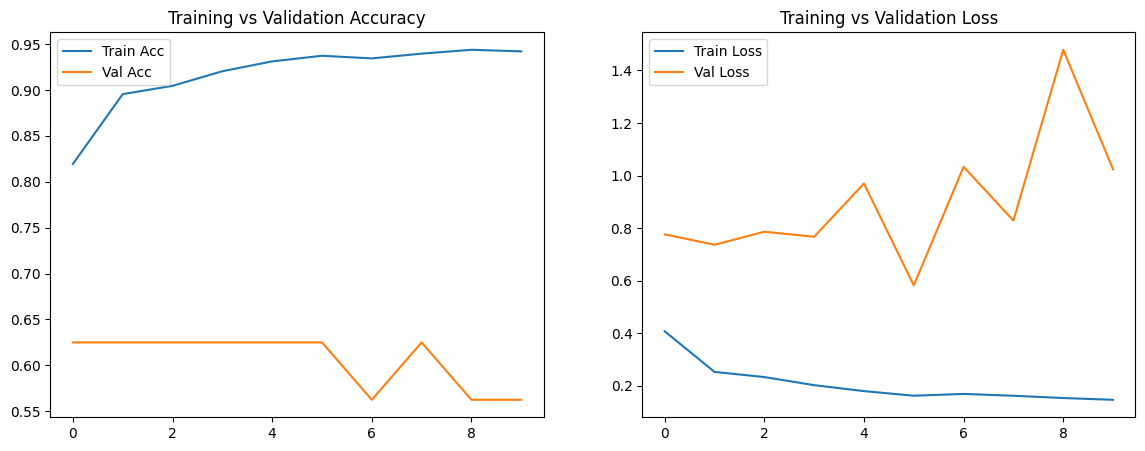

In [13]:

# Plot Accuracy & Loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Acc')
    plt.plot(epochs_range, val_acc, label='Val Acc')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

plot_training_history(history)

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

20/20 [==============================] - 13s 610ms/step - loss: 0.2714 - accuracy: 0.9119

✅ Test Accuracy: 0.9119


In [ ]:
# Report
print("\n Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))
print("\n Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


 Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.95      0.81      0.87       234
   PNEUMONIA       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624


 Confusion Matrix:
 [[189  45]
 [ 10 380]]


8. **Test prediction**:

In [19]:
# 🔍 Load saved model & predict a sample image
model = tf.keras.models.load_model('/kaggle/working/cnn_model.h5')

In [22]:
# Load image
from tensorflow.keras.preprocessing import image

image_path = os.path.join(base_dir, 'val/PNEUMONIA/person1949_bacteria_4880.jpeg')
img = image.load_img(image_path, target_size=(image_size, image_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [28]:
# Predict
prediction = model.predict(img_array)
label = ('PNEUMONIA') if prediction[0][0] > 0.5 else 'NORMAL'

# Interpret the prediction
if prediction[0] < 0.5:
    print("The image is NORMAL.")
else:
    print("The image indicates PNEUMONIA.")


1/1 [==============================] - 0s 36ms/step
The image indicates PNEUMONIA.


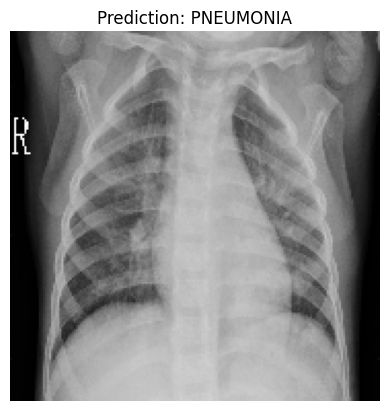

In [29]:
# Show result
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()